# OCR image form to entities

Goal: The goal is to run OCR on the images, get the text from the form, clean the text and perform simple NER to identify the key fields that we are looking for. The goal of the assignment is to assess the level of understanding and approach when solving a given problem. <br>

Dataset: 'dataset' folder in same directory <br>
Time Given for task: 4 days

### Steps & Expectations for the Candidate: <br>



1.   Image Processing

>*   Load the given image forms.
>*   Apply necessary preprocessing techniques to make them suitable for OCR (e.g., thresholding, noise reduction).

2.   OCR Application

>*   Extract text data from the processed images using an OCR solution of the candidate's choice.

3.   Text Data Cleaning

>*   Process the extracted text to remove any artefacts or errors introduced during the OCR process.
>*   Format the cleaned text for further processing.

4.   Named Entity Recognition (NER) or key information extraction + Mapping

>*   Use either a pre-trained model or design a solution to identify specific entities from the cleaned text, namely:
>>i.   Name <br>
>>ii.   Travelling Date <br>
>>iii.   Flight Number <br>
>>iv.   Controlled Items Indicator (e.g., Yes/No, Checked/Unchecked) <br>

>*   Candidates can leverage large language models or other ML techniques to build or improve their NER system.

5.   Data Storage

>*   Design a schema or model to represent the extracted information.
>*   Store the processed data in a structured format, preferably a database or similar storage system. (eg: MySQL, SQLite or CSV)

6.   UI/UX

>*   Implement a basic user interface where an individual can upload an image, see the extracted data, and manually edit it if needed. (eg: Streamlit, Gradio, or similar) <br>

You will be required to work on a Jupyter notebook that uses libraries compatible with Python v3.8. You might want to set up a virtual environment for this. Do share with us the ipynb notebook file. Please make sure to comment your codes (section by section) on why you chose this approach and explain it in simple words. Feel free to leverage on any 3rd party services or open source libraries.





# Below is the python code of how I trained my own custom NER model.

In [1]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = ("Main Customs Office Potsdam Day of Arrival in Berlin SXF 19/09/2023 SG C - KR 1 - KEFR - KE 11 Flight Number MH1234 Berlin-Airport Tegel Reference Number (loss report already done) Customs Declaration For lost / forwarded Baggage Each arriving traveler or responsible fellow passenger must provide the following information for lost/forwarded baggage. 1. Traveler Name: JOHN DOE First name: JOHN Fellow Nr. of travelers under travelers: the age of 15/17: 0 City: BERLIN Street / Number: Lychener Str. 46 Country: BERLIN Zip code: 54580 2. Information about goods In my lost / forwarded baggage There are no goods from a non-EU country in my lost / forwarded baggage. X My lost / forwarded baggage contains the following goods from non-EU countries: Goods Description of articles/Amount Value In Euro Tobacco products Alcohol and beverages containing alcohol Medical products XANNAX 20 XI Other goods 3. Information about my other baggage (Incl. carry-on baggage) which I'm carrying with me right now . There are no goods from a non-EU country in my other Baggage (incl. carry-on baggage). X My other Baggage (incl. carry-on baggage) contains the following goods from non-EU countries Goods Description of articles/Amount Value In Euro Tobacco products Alcohol and beverages containing alcohol 4 Medical products IVERMECTIN 50 Other goods I am aware that a false, Inaccurate or Incomplete declaration may lead to legal consequences.")
doc = nlp(text)

train = [
    ("Form I Tag a c a INDIAN CUSTOMS DECLARATION FORM (Please see important information given below before filling this Form) 1. Name of the JANE DOE Passenger 2. Passport Number AA12345678 3. Nationality MALAYSIAN 4. Date of Arrival 18/09/2023DD/MM/YVY) 5. Flight No. AK123 6. Number of Baggages 2 ...-........ 7. Country from where coming MALAYSIA (including hand baggages) 8. Countries visited in last six days NIL 9. Total value of dutiable goods being imported (Rs.) 10. Are you bringing the following items into India? (please tick Yes or No) (i) Prohibited Articles Yes (11) Gold jewellery (over Free Allowance) Yes (11) Gold Bullion No (iv) Meat and meat products/dairy products/fish/poultry products Yes (v) Seeds/plants/seeds/fruits/flowers/other planting material Yes (/ No (vi) Satellite phone Yes (vii) Indian currency exceeding Rs. 10,000/- Yes / No (viii) Foreign currency notes exceed US $ 5,000 or equivalent No (ix) Aggregate value of foreign exchange including currency exceeds US S 10,000 or equivalent. Yes / No Please report to Customs Officer at the Red Channel counter in case answer to any of the above question is 'Yes'. Signature of Passenger ...............................",{"entities":[(136,144,"name"),(229,239,"date"),(264,271,"flight_number")]}),
    ("Main Customs Office Potsdam Day of Arrival in Berlin SXF 19/09/2023 SG C - KR 1 - KEFR - KE 11 Flight Number MH1234 Berlin-Airport Tegel Reference Number (loss report already done) Customs Declaration For lost / forwarded Baggage Each arriving traveler or responsible fellow passenger must provide the following information for lost/forwarded baggage. 1. Traveler Name: JOHN DOE First name: JOHN Fellow Nr. of travelers under travelers: the age of 15/17: 0 City: BERLIN Street / Number: Lychener Str. 46 Country: BERLIN Zip code: 54580 2. Information about goods In my lost / forwarded baggage There are no goods from a non-EU country in my lost / forwarded baggage. X My lost / forwarded baggage contains the following goods from non-EU countries: Goods Description of articles/Amount Value In Euro Tobacco products Alcohol and beverages containing alcohol Medical products XANNAX 20 XI Other goods 3. Information about my other baggage (Incl. carry-on baggage) which I'm carrying with me right now . There are no goods from a non-EU country in my other Baggage (incl. carry-on baggage). X My other Baggage (incl. carry-on baggage) contains the following goods from non-EU countries Goods Description of articles/Amount Value In Euro Tobacco products Alcohol and beverages containing alcohol 4 Medical products IVERMECTIN 50 Other goods I am aware that a false, Inaccurate or Incomplete declaration may lead to legal consequences.",{"entities":[(57,67,"date"),(370,378,"name"),(109,115,"flight_number"),(876,882,"goods"),(1314,1324,"goods")]}),
]

import pandas as pd
import os
from tqdm import tqdm
from spacy.tokens import DocBin

db = DocBin() # create a DocBin object

for text, annot in tqdm(train): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)

db.to_disk("./train.spacy") # save the docbin object

100%|██████████| 2/2 [00:00<00:00, 212.84it/s]

Skipping entity
Skipping entity
Skipping entity


# Get config file
*   Source: https://spacy.io/usage/training#quickstart
*   Select your requirements and settings
*   Download base_config.cfg





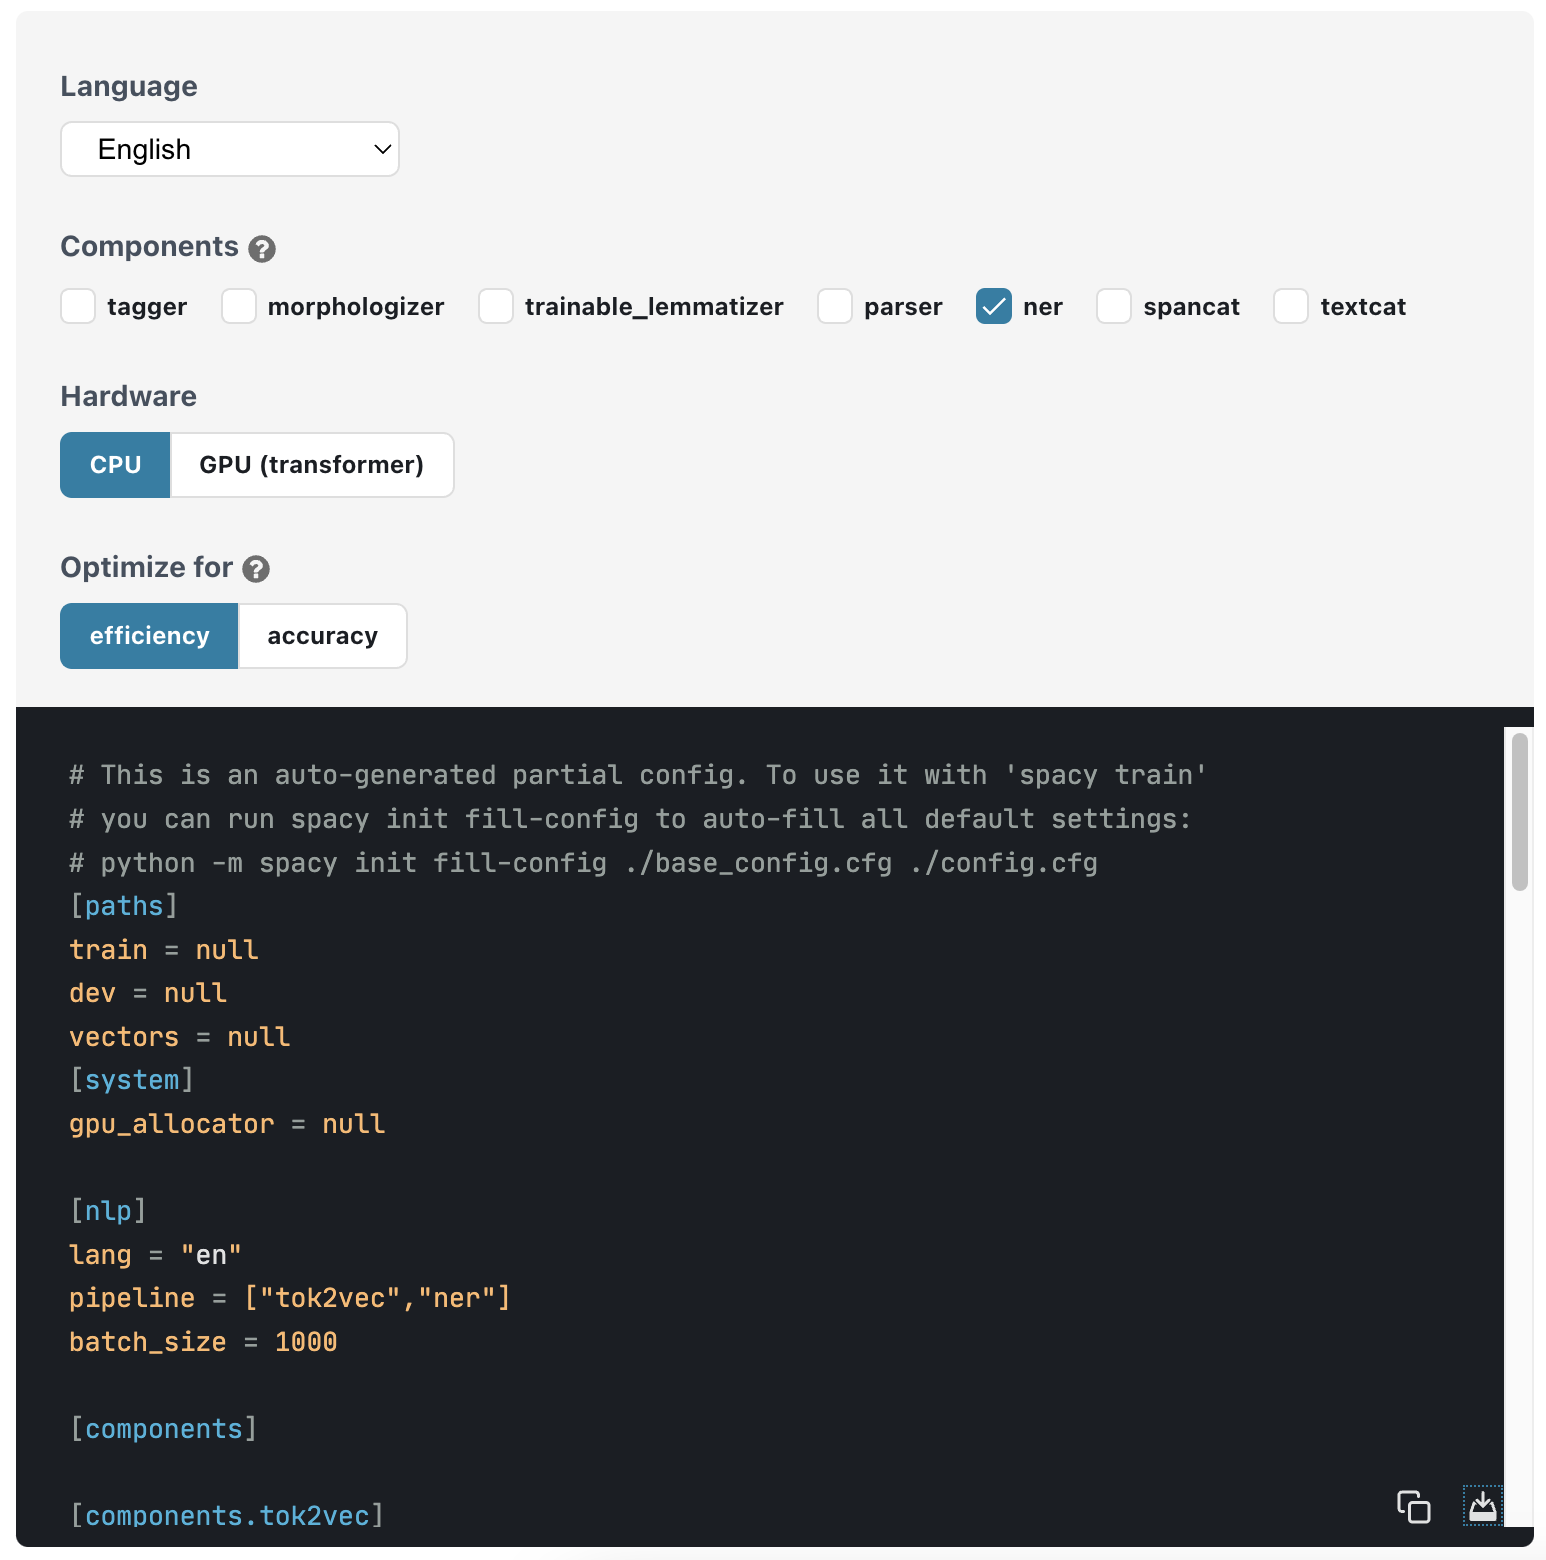

# Using init fill-config to fill in the remaining defaults of base_config.cfg

In [13]:
# !pip install tensorrt

  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-8.6.1.post1-py2.py3-none-any.whl size=17281 sha256=082ebad7946209072ae74d2d95b2db4b95a844b79cddaf4bfe38e1c74128c09a
  Stored in directory: /root/.cache/pip/wheels/f4/c8/0e/b79b08e45752491b9acfdbd69e8a609e8b2ed7640dda5a3e59
Successfully built tensorrt


In [2]:
!python -m spacy init fill-config base_config.cfg config.cfg

2023-09-11 09:19:09.471292: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


# Run Training

In [3]:
!python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy

2023-09-11 09:19:23.595706: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Saving to output directory: output
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00    112.21    0.00    0.00    0.00    0.00
100     200       1375.92   2497.50  100.00  100.00  100.00    1.00
200     400          0.00      0.00  100.00  100.00  100.00    1.00
300     600          0.00      0.00  100.00  100.00  100.00    1.00
400     800          0.00      0.00  100.00  100.00  100.00    1.00
500    1000          0.00      0.00  100.00  100.00  100.00    1.00
600    1200          0.00      0.00  100.00

# Testing custom-trained NER model on sample text

In [4]:
nlp1 = spacy.load(r"./output/model-best") #load the best model
doc = nlp1("Main Customs Office Potsdam Day of Arrival in Berlin SXF 19/09/2023 SG C - KR 1 - KEFR - KE 11 Flight Number MH1234 Berlin-Airport Tegel Reference Number (loss report already done) Customs Declaration For lost / forwarded Baggage Each arriving traveler or responsible fellow passenger must provide the following information for lost/forwarded baggage. 1. Traveler Name: JOHN DOE First name: JOHN Fellow Nr. of travelers under travelers: the age of 15/17: 0 City: BERLIN Street / Number: Lychener Str. 46 Country: BERLIN Zip code: 54580 2. Information about goods In my lost / forwarded baggage There are no goods from a non-EU country in my lost / forwarded baggage. X My lost / forwarded baggage contains the following goods from non-EU countries: Goods Description of articles/Amount Value In Euro Tobacco products Alcohol and beverages containing alcohol Medical products XANNAX 20 XI Other goods 3. Information about my other baggage (Incl. carry-on baggage) which I'm carrying with me right now . There are no goods from a non-EU country in my other Baggage (incl. carry-on baggage). X My other Baggage (incl. carry-on baggage) contains the following goods from non-EU countries Goods Description of articles/Amount Value In Euro Tobacco products Alcohol and beverages containing alcohol 4 Medical products IVERMECTIN 50 Other goods I am aware that a false, Inaccurate or Incomplete declaration may lead to legal consequences") # input sample text

print("Custom Entities Found:")
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

Custom Entities Found:
Entity: 19/09/2023, Label: date
Entity: MH1234, Label: flight_number
Entity: JOHN DOE, Label: name


# Installing necessary python tools

In [ ]:
# !pip install pytesseract

In [ ]:
# !pip install streamlit

# Python code for task: OCR image form to entities

*   Image Input: 'dataset' folder
*   Image preprocessing: Open_cv
*   OCR: pytesseract (easyOCR performed worst. I am sorry I did not have too much time to fine tune.)
*   NER: Custom trained spacy model (Clearly the training dataset i used was insufficient. Hence there the entity recognition was not that great.)
>*   Annotation tools: https://agateteam.org/spacynerannotate/
*   Data Storage: Pandas, csv (Why not MySQL or SQLite? I am more familiar with csv)
*   UI/UX: Streamlit (Why not Gradio? I just picked a random one)


In [ ]:
import os
import cv2
import pytesseract
import streamlit as st
import pandas as pd
import numpy as np
import spacy
import csv

# Step 1: Image Preprocessing
def preprocess_image(uploaded_image):
    # Convert the uploaded file object to an OpenCV image
    image = cv2.imdecode(np.fromstring(uploaded_image.read(), np.uint8), cv2.IMREAD_COLOR)

    # Apply necessary preprocessing techniques
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    denoised_image = cv2.GaussianBlur(binary_image, (5, 5), 0)

    return denoised_image

# Step 2: OCR Application
def extract_text_from_image(uploaded_image):
    preprocessed_image = preprocess_image(uploaded_image)
    text = pytesseract.image_to_string(preprocessed_image)
    return text

# Step 3: Text Data Cleaning
def clean_text(text):
    cleaned_text = text.replace('\n', ' ').strip()
    return cleaned_text

# Step 4: Named Entity Recognition (NER)
def perform_ner(text):
    nlp = spacy.load('./output/model-best')
    doc = nlp(text)

    entities = {}
    for ent in doc.ents:
        entities[ent.label_] = ent.text

    return entities

# Step 5: Data Storage (Using Pandas for simplicity)
def store_data(entities):
    df = pd.DataFrame([entities])
    df.to_csv('extracted_data.csv', index=False)

# Step 6: UI/UX using Streamlit
def main():
    st.title("Image Form Data Extraction")
    uploaded_images = st.file_uploader("Upload multiple images", type=["png", "jpg", "jpeg"], accept_multiple_files=True)

    if uploaded_images:
        for uploaded_image in uploaded_images:
            st.header(f"Extracted Data from {uploaded_image.name}")

            # Extract text from the uploaded image
            text = extract_text_from_image(uploaded_image)
            cleaned_text = clean_text(text)

            # Display the extracted text
            st.subheader("Cleaned Text:")
            st.write(cleaned_text)

            # Perform NER
            entities = perform_ner(cleaned_text)

            # Display the extracted data
            st.subheader("Named Entities:")
            st.write(entities)

            # Step 2: Display the extracted information
            st.header("Extracted Information:")
            for label, text in entities.items():
                st.write(f"{label}: {text}")

            # Step 3: Write data to a CSV file
            csv_file_path = 'extracted_data.csv'
            with open(csv_file_path, mode='w', newline='') as csv_file:
                fieldnames = ['Label', 'Extracted Text']
                csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
                csv_writer.writeheader()

                for label, text in entities.items():
                    csv_writer.writerow({'Label': label, 'Extracted Text': text})

            # Step 4: Display the CSV table
            st.header("Extracted Data in CSV Format:")
            extracted_data = pd.read_csv(csv_file_path)
            st.write(extracted_data)

            # Optionally, provide a download link for the CSV file
            st.markdown(f'[Download CSV](./{csv_file_path})')

if __name__ == "__main__":
    main()


2023-09-11 08:08:41.475 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [ ]:
# !streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.186.22:8501

  Stopping...
^C


# Below are Sample images of code using streamlit

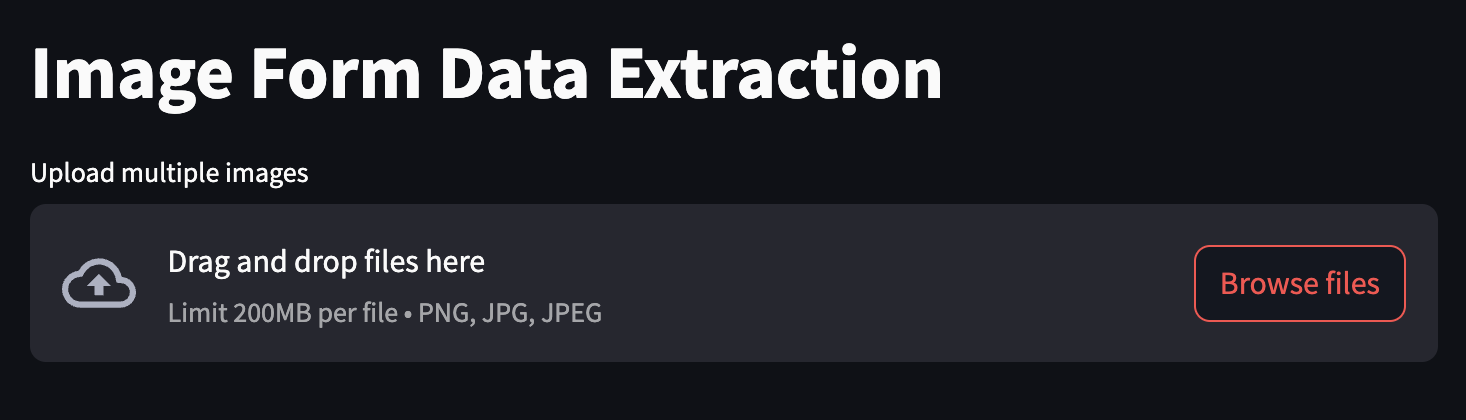

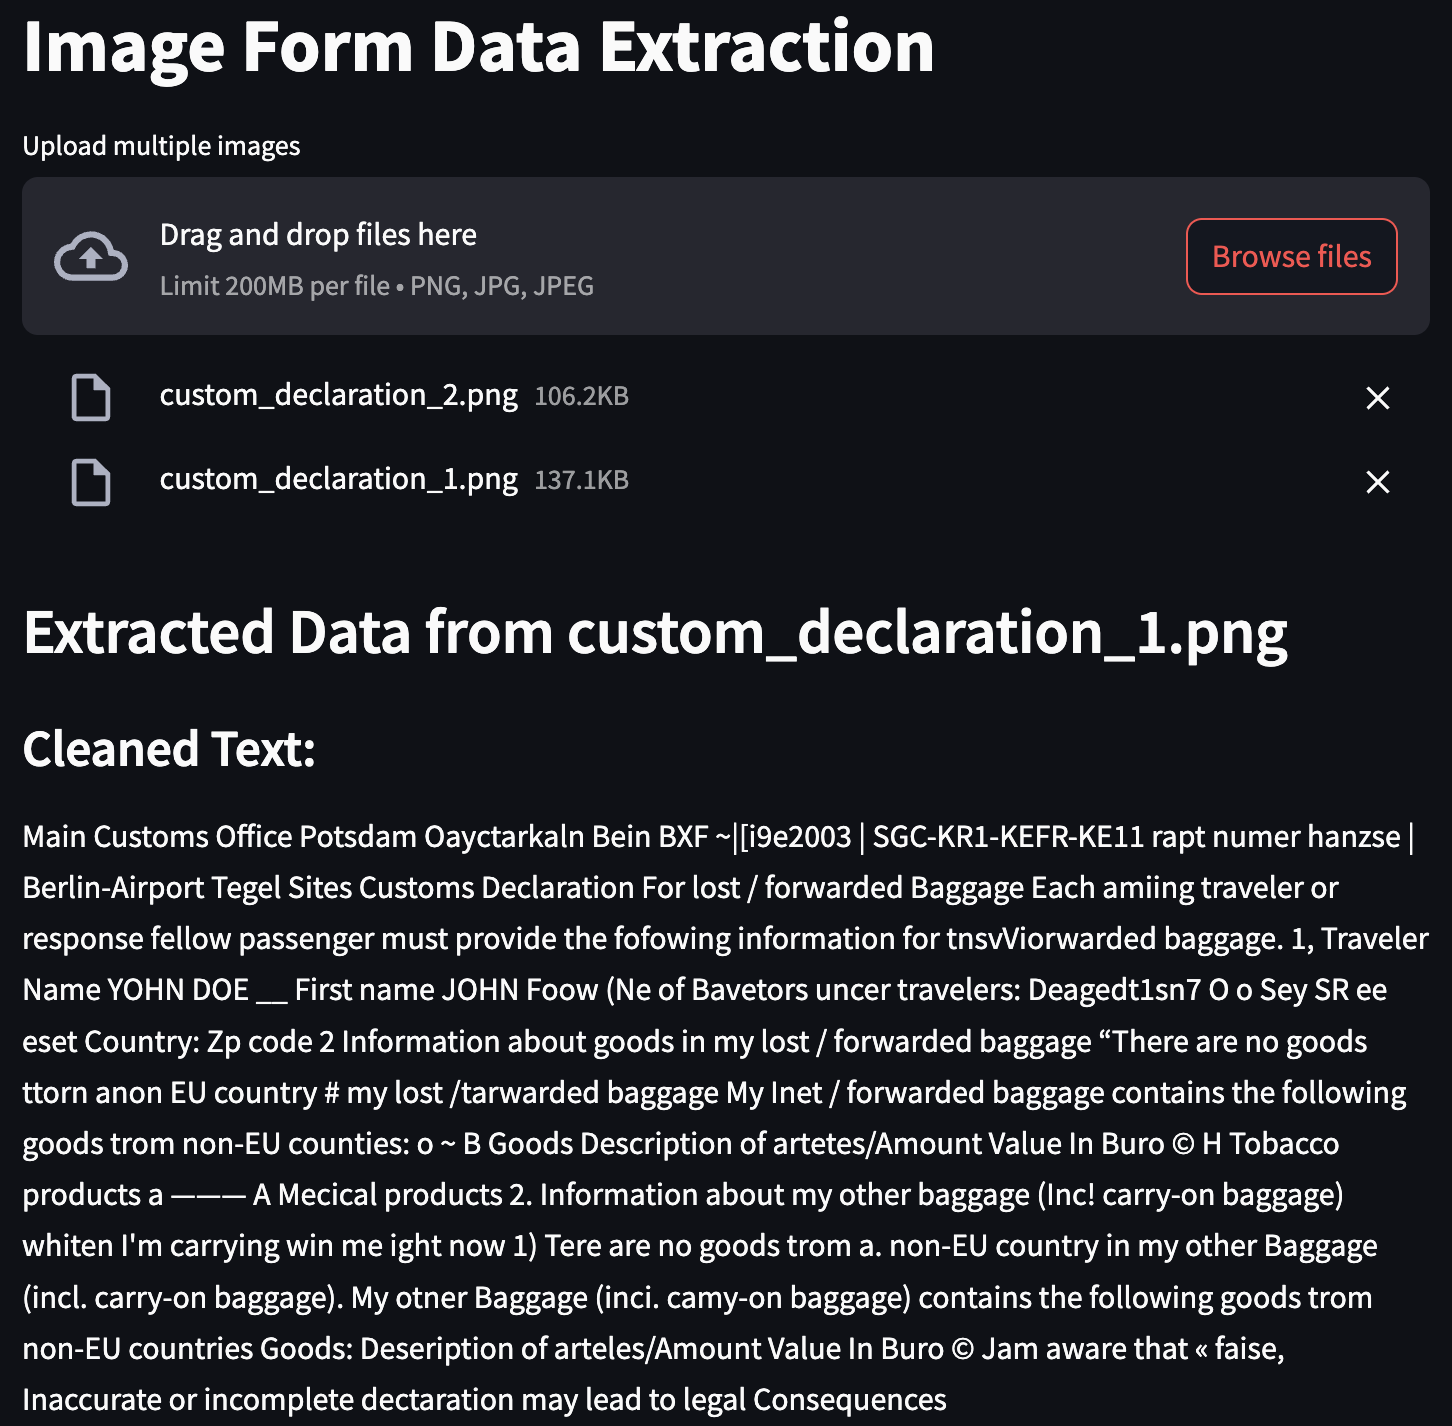

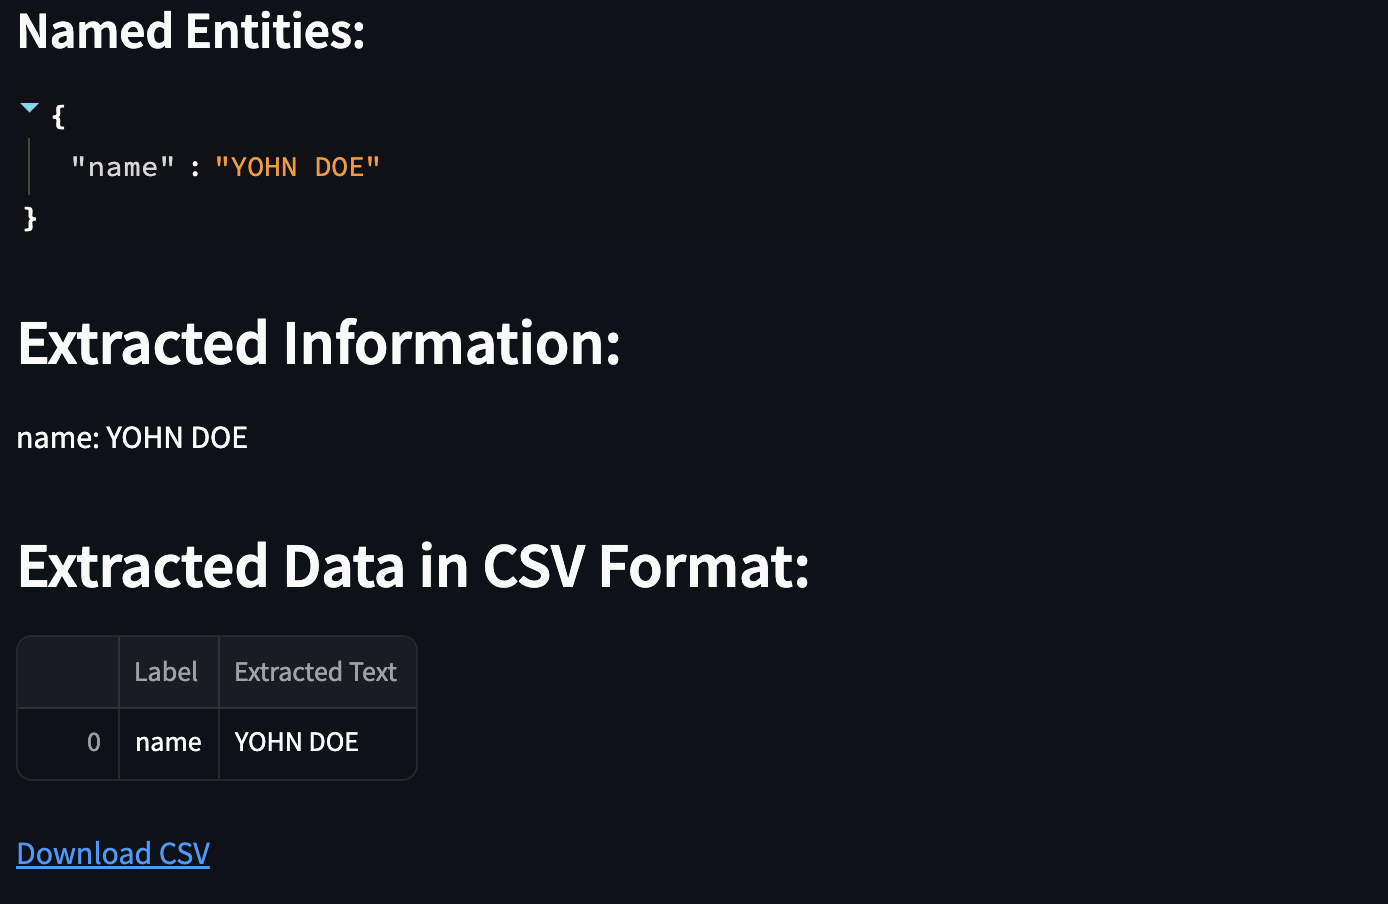

# Checkbox implementation (Not integrated into main code yet)

Process image in gray scale and using an array to detect horizontal and vertical lines. Then add all of it back together to form the checkboxes detected while removing noises in the process. <br>

In [ ]:
# import os
# import cv2
# import numpy as np
# from PIL import Image

# # Specify the path to the 'dataset' folder
# dataset_folder = 'dataset'

# # List all files in the 'dataset' folder
# image_files = [os.path.join(dataset_folder, filename) for filename in os.listdir(dataset_folder) if filename.endswith('.png')]

# # Process each image in the 'dataset' folder
# for image_file in image_files:
#     # Read the image into an array
#     image_array = cv2.imread(image_file)

#     # Check the array type
#     image_type = type(image_array)
#     print("Array Type:", image_type)  # Output: numpy.ndarray

#     # Convert the image to grayscale
#     gray_scale_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

#     # Image thresholding using Otsu's method
#     _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#     # Invert the binary image
#     img_bin = 255 - img_bin

#     # Display the binary image
#     Image.fromarray(img_bin).show()

#     # Set minimum width to detect horizontal lines
#     line_min_width = 13

#     # Create a kernel to detect horizontal lines
#     kernel_h = np.ones((1, line_min_width), np.uint8)

#     # Create a kernel to detect vertical lines
#     kernel_v = np.ones((line_min_width, 1), np.uint8)

#     # Apply the horizontal kernel to the binary image
#     img_bin_horizontal = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel_h)

#     # Apply the vertical kernel to the binary image
#     img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel_v)

#     # Combine the horizontal and vertical line images
#     img_bin_final = img_bin_horizontal | img_bin_v

#     # Perform connected components analysis to label regions
#     _, labels, stats, _ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)

#     # Draw rectangles around detected regions on the original color image
#     for x, y, w, h, area in stats[2:]:
#         cv2.rectangle(image_array, (x, y), (x + w, y + h), (0, 255, 0), 2)

#     # Display the processed image with rectangles drawn around text regions
#     Image.fromarray(image_array).show()


# Improvements to be made:

*   Fine tune image preprocessing for better OCR results
*   Increase train dataset for custom model accuracy
*   Optimize custom Spacy model for accuracy instead of efficiency
*   Train a model for checkbox detection and integrate it into the main code
*   Detect yes/no for second form







# Alternative: custom annotation of forms to define regions of interest

Manually annotate forms to accurately determine labels and extracted text for labels. (Thought process: forms are not changed that frequently)

In [ ]:
# import cv2
# import random

# scale = 0.5
# circles = []
# counter = 0
# counter2 = 0
# point1 = ()
# point2 = ()
# myPoints = []
# myColor = []

# def mousePoints(event, x, y, flags, params):
#     global counter, point1, point2, counter2, circles, myColor
#     if event == cv2.EVENT_LBUTTONDOWN:
#         if counter == 0:
#             point1 = (int(x // scale), int(y // scale))
#             counter += 1
#             myColor = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
#         elif counter == 1:
#             point2 = (int(x // scale), int(y // scale))
#             entity_type = input('Enter entity type: ')
#             entity_name = input('Enter entity name: ')
#             myPoints.append([point1, point2, entity_type, entity_name])
#             counter = 0
#         circles.append([x, y, myColor])
#         counter2 += 1

# img = cv2.imread('dataset/custom_declaration_2.png')
# img = cv2.resize(img, (0, 0), None, scale, scale)

# while True:
#     # Display points
#     for x, y, color in circles:
#         cv2.circle(img, (x, y), 3, color, cv2.FILLED)
#     cv2.imshow("Original Image", img)
#     cv2.setMouseCallback("Original Image", mousePoints)
#     if cv2.waitKey(1) & 0xFF == ord('s'):
#         print(myPoints)
#         break

# cv2.destroyAllWindows()

"""
ROI for custom_declaration_1.png
        [510, 42, 628, 68, 'text', 'date'],
        [512, 72, 626, 94, 'text', 'flight_number'],
        [188, 234, 336, 250, 'text', 'name'],
        [76, 346, 92, 360, 'box', 'no_goods'],
        [74, 382, 90, 400, 'box', 'goods'],
        [76, 444, 90, 460, 'box', 'tobacco'],
        [74, 464, 90, 480, 'box', 'alcohol'],
        [76, 496, 90, 514, 'box', 'medical'],
        [74, 518, 88, 532, 'box', 'others'],
        [308, 442, 458, 456, 'text', 'tobacco'],
        [310, 474, 458, 488, 'text', 'alcohol'],
        [308, 492, 458, 510, 'text', 'medical'],
        [310, 510, 458, 530, 'text', 'others'],
        [76, 594, 90, 612, 'box', 'no_goods'],
        [76, 628, 92, 642, 'box', 'goods'],
        [76, 692, 90, 708, 'box', 'tobacco'],
        [76, 712, 92, 730, 'box', 'alcohol'],
        [76, 744, 92, 760, 'box', 'medical'],
        [76, 766, 90, 780, 'box', 'others'],
        [312, 688, 458, 704, 'text', 'tobacco'],
        [308, 722, 458, 736, 'text', 'alcohol'],
        [310, 740, 458, 756, 'text', 'medical'],
        [310, 756, 460, 776, 'text', 'others']
"""
"""
ROI for custom_declaration_2.png
        [(220, 232), (638, 252), 'text', 'name'],
        [(218, 314), (288, 332), 'text', 'date'],
        [(568, 310), (654, 334), 'text', 'flight_number']
"""